In [151]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

plt.style.use('seaborn')

In [152]:
colors = ["#83c5be","#e29578","#785964","#C7BC66"]

In [153]:
def get_times(file):
    edges, times = [], []
    with open(file) as f:
        for line in f:
            line = line.strip()
            x, y = map(float, line.split(","))
            edges.append(x)
            times.append(y)
    return edges, times

In [154]:
bnw_edges, bnw_times = get_times("runs/size-1.csv")
bf_edges, bf_times = get_times("runs/size-bellman.csv")
bfn_edges, bfn_times = get_times("runs/size-neg-bellman.csv")
bnwn_edges, bnwn_times = get_times("runs/size-neg-bnw.csv")

/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


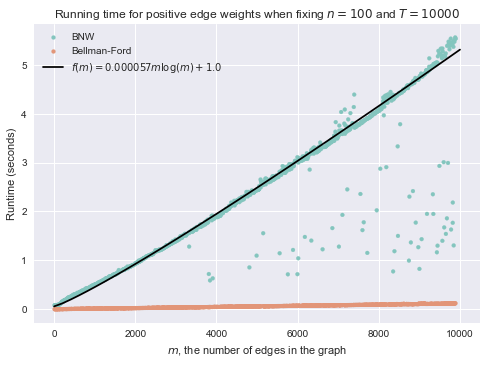

In [155]:
plt.title("Running time for positive edge weights when fixing $n=100$ and $T=10000$")
plt.xlabel("$m$, the number of edges in the graph")
plt.ylabel("Runtime (seconds)")

i1, i2 = 325, 601
m = (bnw_times[i1] - bnw_times[i2]) / (bnw_edges[i1] - bnw_edges[i2])

X, Y = [], []
for i in range(len(bnw_edges)):
    x, y = bnw_edges[i], bnw_times[i]
    if y >= bnw_times[i1] + m * (x - bnw_edges[i1]):
        X.append(bnw_edges[i])
        Y.append(bnw_times[i])

func = lambda x, a, b, c: a * x * np.log(x) + c
popt, _ = curve_fit(func, X, Y, maxfev=10000)

inp = np.linspace(1, 10000)
out = func(inp, *popt)

plt.scatter(bnw_edges, bnw_times, s=[15]*len(bnw_edges), c=colors[0], label="BNW")
plt.scatter(bf_edges, bf_times, s=[15]*len(bf_edges), c=colors[1], label="Bellman-Ford")
plt.plot(inp, out, c='black', label="$f(m) = {:2f}m \\log(m) + {}$".format(*map(float, popt)))
plt.legend()
plt.savefig("size.pdf")

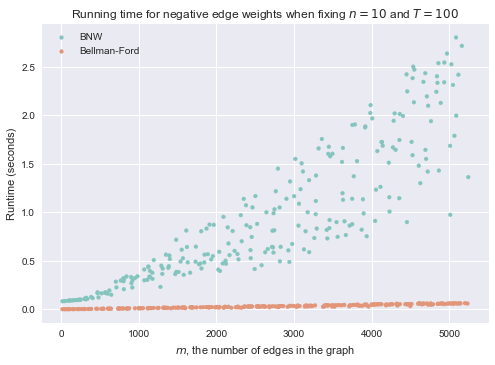

In [156]:
plt.title("Running time for negative edge weights when fixing $n=10$ and $T=100$")
plt.xlabel("$m$, the number of edges in the graph")
plt.ylabel("Runtime (seconds)")

plt.scatter(bnwn_edges, bnwn_times, s=[15]*len(bnwn_edges), c=colors[0], label="BNW")
plt.scatter(bfn_edges, bfn_times, s=[15]*len(bfn_edges), c=colors[1], label="Bellman-Ford")
plt.legend()
plt.savefig("neg.pdf")